In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleanning and analysis

In [33]:
data = pd.read_csv('housing_train.csv')

# Drop ID because doesn't give any information
data.drop('Id',inplace=True,axis=1)

# Add the groups column for classification
grupos = []
for i in range(len(data['SalePrice'])):
    if int(data['SalePrice'][i]) <= 100000:
        grupos.append("group 1")
    elif int(data['SalePrice'][i]) >= 100001 and int(data['SalePrice'][i]) <= 300000:
        grupos.append("group 2")
    elif int(data['SalePrice'][i]) >= 300001 and int(data['SalePrice'][i]) <= 500000:
        grupos.append("group 3")
    elif int(data['SalePrice'][i]) >= 500001:
        grupos.append("group 4")
    else:
        grupos.append("grupo 0")
        
data['Groups'] = grupos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [34]:
# Dealing with missing values
for i in data.columns:
    if(data[i].isna().sum()>=146):
        data.drop(i,inplace=True,axis=1)
    else:
        data[i] = data[i].fillna(method='ffill')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non

In [36]:
data.describe(include=[np.number])

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.492466,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.795612,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,165.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
data.describe(include=[np.object])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Groups
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,6,3,5,5,3,9,6,4
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,group 2
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,914,638,1385,1404,1340,1267,1198,1222


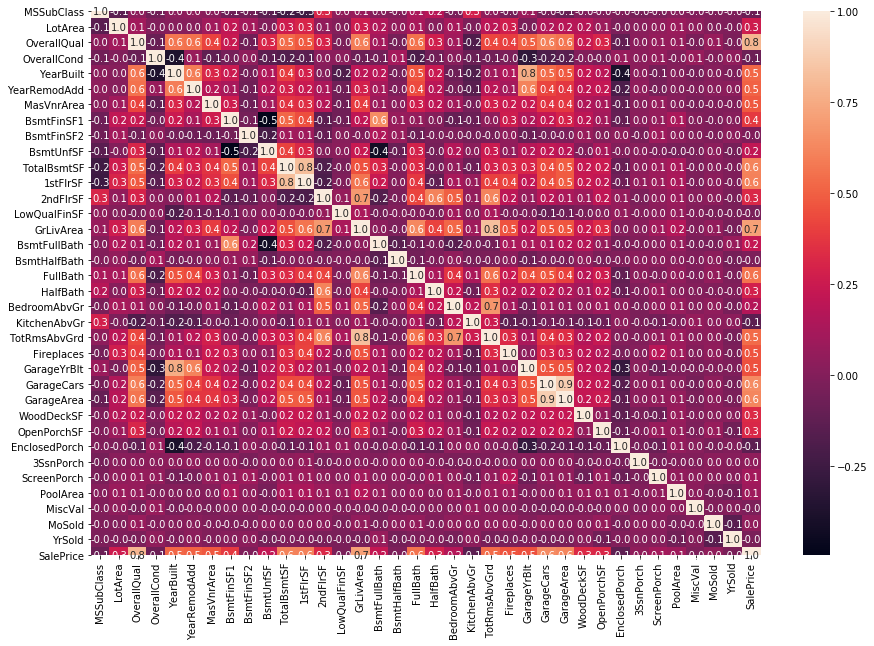

In [38]:
# Looking at correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')

In [39]:
# Creating a list with the names of all the columns with categorical value
dt = data.dtypes==object
col = data.columns[dt].tolist()
col.remove('Groups')
print(col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Using LabelEncoder to convert categorical values in numbers ranging 0 to n-1 classes
le = LabelEncoder()
x = data[col].apply(le.fit_transform)

# Using OneHotEncoder to divide each transformed column in different columns so that the model
# doesn't think that the tranformed columns follow any kind of order or hierarchy
# https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

oneList=[]
one = OneHotEncoder()
oneData = one.fit_transform(x).toarray()

/home/dmiranda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [41]:
# Creating a list with all the columns with numerical vales
dt = data.dtypes!=object
col = data.columns[dt].tolist()
col.remove('SalePrice')
print(col)

# putting all the data back together
new_x = np.append(data[col],x,axis=1)
new_x.shape

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


(1460, 73)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# For regression
train_x,test_x,train_y,test_y = train_test_split(new_x,data['SalePrice'],test_size=0.2,random_state=101)

# For classification
train_cat_x, test_cat_x, train_cat_y, test_cat_y = train_test_split(new_x, data['Groups'], test_size=0.2, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalizing the data to range between 0 and 1
sc = MinMaxScaler(feature_range=(0, 1))
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

train_cat_x = sc.fit_transform(train_cat_x)
test_cat_x = sc.transform(test_cat_x)

## Regression Tree

In [44]:
from sklearn import tree
from sklearn.metrics import mean_absolute_error,mean_squared_error

clf = tree.DecisionTreeRegressor()
clf = clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
print("MSE: " + str(mean_squared_error(test_y, y_pred)))
print("RMSE:" + str(np.sqrt(mean_squared_error(test_y, y_pred))))
print("MAE: " + str(mean_absolute_error(test_y, y_pred)))

MSE: 1343100759.7773972
RMSE:36648.339113490496
MAE: 25023.010273972603


## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(train_x, train_y)
y_pred2 = regr.predict(test_x)

print("MSE: " + str(mean_squared_error(test_y, y_pred2)))
print("RMSE: " + str(np.sqrt(mean_squared_error(test_y, y_pred2))))
print("MAE: " + str(mean_absolute_error(test_y, y_pred2)))

MSE: 1556700732.947047
RMSE: 39455.046989543014
MAE: 26099.6113000897


/home/dmiranda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We actually get a really high error because the target feature 'Sale Price' is a number in the order of 10^6. That's why it'll be better to use another kind of algorithm for our model

## Classification Tree

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Cross validation
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
pred = clf.fit(new_x, data['Groups'])
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/home/dmiranda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8952054794520548 {'max_depth': 9}


In [47]:
from sklearn.tree import DecisionTreeClassifier

# And confusion matrix
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_cat_x, train_cat_y)
pred = clf.predict(test_cat_x)
pd.crosstab(test_cat_y, pred, rownames=['Groups'], colnames=['Predicted'])

Predicted,group 1,group 2,group 3,group 4
Groups,,,,
group 1,18,10,0,0
group 2,11,224,5,0
group 3,0,8,14,1
group 4,0,0,1,0


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Validación cruzada
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4)
pred = clf.fit(new_x, data['Groups'])
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/home/dmiranda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9116438356164384 {'max_depth': 10}


/home/dmiranda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
from sklearn.ensemble import RandomForestClassifier

# And confusion matrix
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train_cat_x, train_cat_y)
pred = clf.predict(test_cat_x)
pd.crosstab(test_cat_y, pred, rownames=['Groups'], colnames=['Predicted'])

/home/dmiranda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predicted,group 1,group 2,group 3,group 4
Groups,,,,
group 1,17,11,0,0
group 2,0,236,3,1
group 3,0,9,14,0
group 4,0,0,1,0


Results are way better using a classification model because we divided the data into groups and the margin of error is way smaller